## Feature Engineering and Pre-Processing for House Price Data
#### By Nick Brooks

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# import plotly.plotly as py

In [3]:
#path= r"D:\My Computer\DATA\House Prices" #Windows
path= r"/Users/nicapotato/Desktop/Data/House" #Mac

train_df = pd.read_csv(open(os.path.join(path, "train.csv"), "r"), index_col='Id')
test_df = pd.read_csv(open(os.path.join(path, "test.csv"), "r"), index_col='Id')

In [ ]:
# Read
train_df = pd.read_csv("../input/train.csv", index_col='Id')
test_df = pd.read_csv("../input/test.csv", index_col='Id')

In [4]:
combine = [train_df, test_df]

In [67]:
# Dtypes
combine[0].dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [59]:
# Custom Descriptive Statistics
object_info = pd.DataFrame()
num_info = pd.DataFrame()
for x in combine[0].columns:
    if combine[0][x].dtype == "object":
        object_info = object_info.append({'Column': x, 'dtype': combine[0][x].dtypes, 'Count': combine[0][x].count().astype(int), 'Missing %':(combine[0][x].isnull().sum()/combine[0].shape[0])*100,
                                    'Unique': len(combine[0][x].unique())},ignore_index=True)
    else:
        num_info = num_info.append({'Column': x, 'dtype': combine[0][x].dtypes, 'Count': combine[0][x].count().astype(int), 'Missing %':(combine[0][x].isnull().sum()/combine[0].shape[0])*100,
                                    'Unique': len(combine[0][x].unique()), 'Stdev':combine[0][x].std(),
                                  'Mean':combine[0][x].mean(), 'Stdev':combine[0][x].std(), 'Variance':combine[0][x].var()
                                   },ignore_index=True)

In [63]:
object_info

,Column,Count,Missing %,Unique,dtype
0,MSZoning,1460.0,0.000000,5.0,object
1,Street,1460.0,0.000000,2.0,object
2,Alley,91.0,93.767123,3.0,object
3,LotShape,1460.0,0.000000,4.0,object
4,LandContour,1460.0,0.000000,4.0,object
5,Utilities,1460.0,0.000000,2.0,object
6,LotConfig,1460.0,0.000000,5.0,object
7,LandSlope,1460.0,0.000000,3.0,object
8,Neighborhood,1460.0,0.000000,25.0,object
9,Condition1,1460.0,0.000000,9.0,object


In [64]:
num_info

,Column,Count,Mean,Missing %,Stdev,Unique,Variance,dtype
0,MSSubClass,1460.0,56.897260,0.000000,42.300571,15.0,1.789338e+03,int64
1,LotFrontage,1201.0,70.049958,17.739726,24.284752,111.0,5.897492e+02,float64
2,LotArea,1460.0,10516.828082,0.000000,9981.264932,1073.0,9.962565e+07,int64
3,OverallQual,1460.0,6.099315,0.000000,1.382997,10.0,1.912679e+00,int64
4,OverallCond,1460.0,5.575342,0.000000,1.112799,9.0,1.238322e+00,int64
5,YearBuilt,1460.0,1971.267808,0.000000,30.202904,112.0,9.122154e+02,int64
6,YearRemodAdd,1460.0,1984.865753,0.000000,20.645407,61.0,4.262328e+02,int64
7,MasVnrArea,1452.0,103.685262,0.547945,181.066207,328.0,3.278497e+04,float64
8,BsmtFinSF1,1460.0,443.639726,0.000000,456.098091,637.0,2.080255e+05,int64
9,BsmtFinSF2,1460.0,46.549315,0.000000,161.319273,144.0,2.602391e+04,int64


## Dependent Variable

Could use normalization

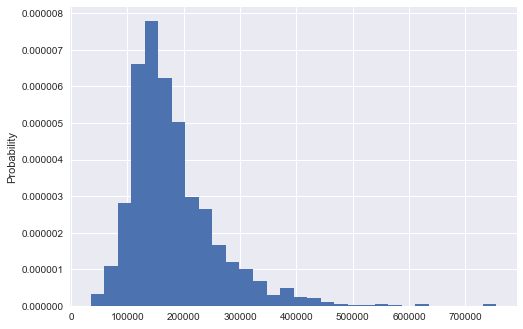

In [8]:
plt.hist(train_df.SalePrice, normed=True, bins=30)
plt.ylabel('Probability');

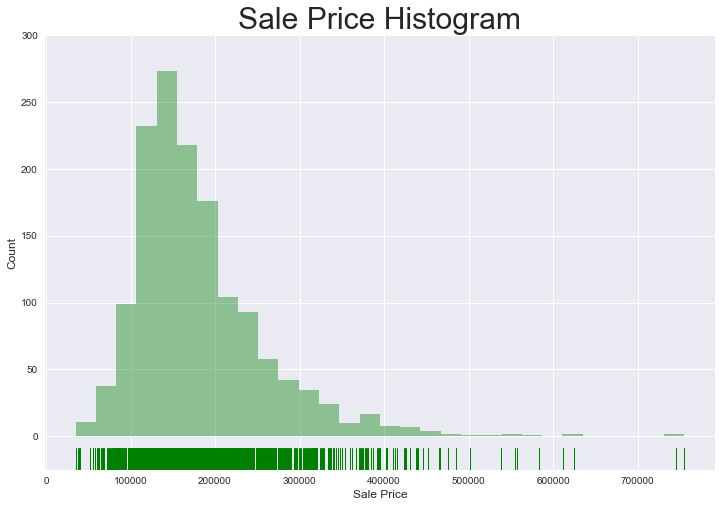

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(train_df.SalePrice, bins=30, kde=False, rug=True, color="g")
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Sale Price Histogram",fontsize=30)
plt.ylim(-25, 300)
plt.show()

## Missing Values

In [10]:
# Proportion Missing Table:
settypes= combine[0].dtypes.reset_index()
def test_train_mis(test, train):
    missing_test = test.isnull().sum(axis=0).reset_index()
    missing_test.columns = ['column_name', 'test_missing_count']
    missing_test['test_missing_ratio'] = missing_test['test_missing_count'] / test_df.shape[0]
    missing_train = train.isnull().sum(axis=0).reset_index()
    missing_train.columns = ['column_name', 'train_missing_count']
    missing_train['train_missing_ratio'] = missing_train['train_missing_count'] / train_df.shape[0]
    missing = pd.merge(missing_train, missing_test,
                       on='column_name', how='outer',indicator=True,
                      # suffixes=["_L", "_R"]
                       # left_on='name on left', right_on='name on right')
                      )
    missing = pd.merge(missing,settypes, left_on='column_name', right_on='index',how='inner')
    missing = missing.loc[(missing['train_missing_ratio']>0) | (missing['test_missing_ratio']>0)]\
    .sort_values(by=["train_missing_ratio"], ascending=False)
    missing['Diff'] = missing.train_missing_count - missing.test_missing_count
    print(missing)
    return missing

In [11]:
def missing_plot(train_df):
    missing_df = train_df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.loc[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')

    ind = np.arange(missing_df.shape[0])
    width = 0.9
    fig, ax = plt.subplots(figsize=(12,18))
    rects = ax.barh(ind, missing_df.missing_count.values, color='red')
    ax.set_yticks(ind)
    ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
    ax.set_xlabel("Count of missing values")
    ax.set_title("Number of missing values in each column")
    plt.show()

#### Visualize

In [12]:
pd.options.display.max_rows = 65
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,34
1,float64,3
2,object,43


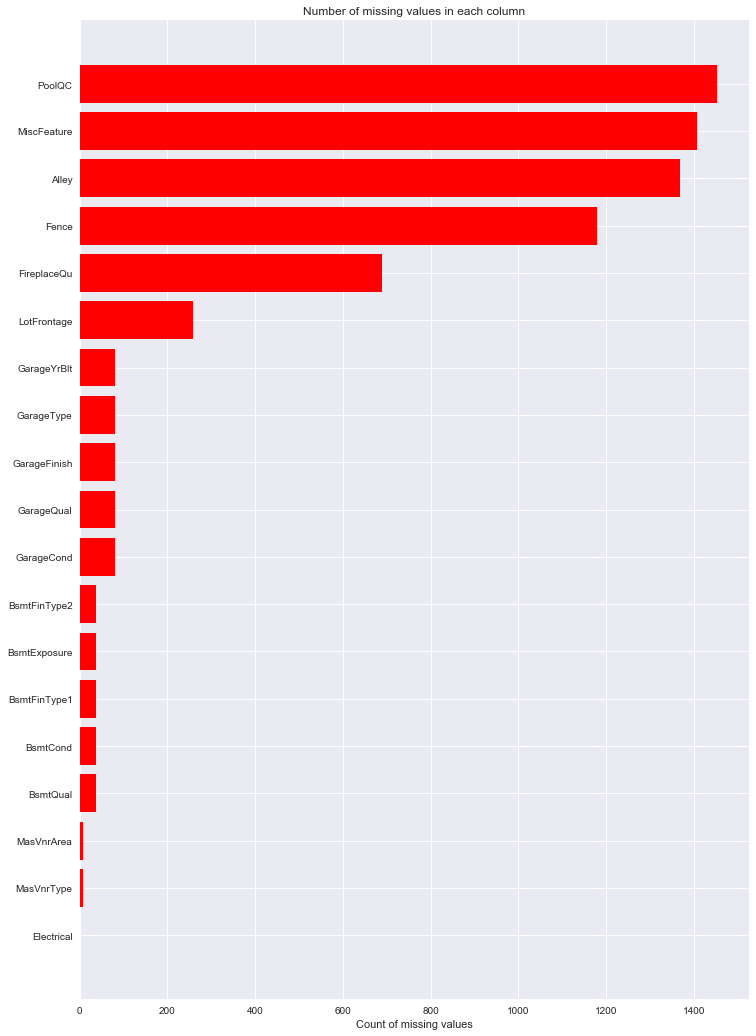

In [13]:
missing_plot(train_df)

In [70]:
missing = test_train_mis(combine[0],combine[1])

Empty DataFrame
Columns: [column_name, train_missing_count, train_missing_ratio, test_missing_count, test_missing_ratio, _merge, index, 0, Diff]
Index: []


In [15]:
drop = list(missing.column_name[:5]); print(drop)
for i in list(range(len(combine))):
    combine[i] =combine[i].drop(drop, axis = 1)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


## Imputation

In [16]:
#?pd.DataFrame.fillna()
# If I wanted to input column mean
# Would have to compute the mean with a function that igores NaNs

In [66]:
for i in list(range(len(combine))):
    combine[i].loc[:, combine[i].dtypes == float] = combine[i].loc[:, combine[i].dtypes == float].fillna(combine[i].mean())
    combine[i].loc[:, combine[i].dtypes == object] = combine[i].loc[:, combine[i].dtypes == object].fillna(combine[i].mode().iloc[0])
    combine[i].loc[:, combine[i].dtypes == int] =combine[i].loc[:, combine[i].dtypes == int].fillna(combine[i].median())

In [98]:
for dataset in combine:
    #print(dataset.isnull().values.ravel().sum())
    print(np.count_nonzero(dataset.isnull().values.ravel()))

0
0


In [72]:
combine[0].select_dtypes(include=['object']).columns
# pd.DataFrame.select_dtypes

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
for i in list(range(len(combine))):
    combine[i] = pd.get_dummies(combine[i],
        columns=combine[i].select_dtypes(include=['object']).columns)

In [74]:
print(combine[0].shape)
combine[0].head()

(1460, 271)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDriv

In [75]:
pd.options.display.max_rows = 65
dtype_df = combine[0].dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,uint8,234
1,int64,34
2,float64,3


In [77]:
combine[0].shape, combine[1].shape

((1460, 271), (1459, 254))

In [84]:
diffcols = combine[0].columns.difference(combine[1].columns)
print(diffcols)
SalePrice = combine[0].SalePrice.copy()
combine[0] = combine[0].drop(diffcols, axis=1)

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice', 'Utilities_NoSeWa'],
      dtype='object')

In [99]:
combine[0].columns.equals(combine[1].columns)

False

In [96]:
combine[0].shape, combine[1].shape

((1460, 255), (1459, 254))

In [95]:
combine[0]['SalePrice'] = SalePrice

In [ ]:
combine[0].to_csv("house_train.csv",header=True,index=True)
combine[1].to_csv("house_test.csv",header=True,index=True)

In [97]:
# combine[0].to_csv((os.path.join(path,r"house_train.csv")),header=True,index=True)
# combine[1].to_csv((os.path.join(path,r"house_test.csv")),header=True,index=True)